# FDS I - Projeto Final: Titanic
## Aluno: Matheus Antônio Scussel Borges

![Titanic partindo do porto de Southampton](titanic.jpg)



### Introdução

No processo de análise de dados do projeto Titanic foi utilizado um banco de dados em formato ".csv" provido por este desafio do [Kaggle.](https://www.kaggle.com/c/titanic/data)

O Titanic foi um grande navio do começo do século XX famoso por ter sido considerado como o mais luxuoso e mais seguro de sua época, gerando lendas que diziam que eram impossível de ser afundado. Fato que infelizmente a história se comprovou ao contrário ao naufragar colidindo com um iceberg e causando grande perda humana.

### Metodologia

A metodologia utilizada nesse projeto foi a apresentada nesse curso sendo dividida nas seguintes etapas:

Etapa | Descrição
------------ | ------------
1 | Fazer perguntas - Hipóteses
2 | Limpar os dados
3 | Realizar a análise exploratória de dados
4 | Tirar conclusões
5 | Comunicar os resultados

Além disso, buscou-se ao máximo possível utilizar storytelling para comunicar as informações.

### Objetivo:
Iremos realizar um estudo desses dados, e identificar quais são os fatores com suas respectivas variáveis que levaram ou não, a uma maior influência na mortalidade das pessoas envolvidas no acidente.

#### Libraries utilizadas no projeto

In [249]:
# Importando as libraries utilizadas no estudo:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Banco de dados Titanic

Como veremos logo abaixo, dos 2.224 passageiros, o banco da dados em estudo possui dados de **891** passageiros, sendo esse o número de nossas *samples* inicial.

Além disso, possuimos **12** colunas representando os tipos diferentes de dados, sendo elas nossas *features*:

Index | Features | Significados
------------ | ------------ | -------------
1 | PassengerId | Id do Passageiro
2 | Survived | Se sobreviveu ou não (1,0)
3 | Pclass | Classe (1,2,3)
4 | Name | Nome
5 | Sex | Gênero
6 | Age | Idade
7 | SibSp | Número de Irmãos/Cônjuges no navio
8 | Parch | Número de parentes no navio
9 | Ticket | Número do ticket
10 | Fare | Preço da passagem
11 | Cabin | Número da cabine
12 | Embarked | Porto de origem (C,Q,S)

In [373]:
# Leitura do banco de dados "titanic.csv":
df_titanic = pd.read_csv("titanic.csv")
# Primeiras linhas do banco de dados
display(df_titanic.head())
# Dimensões do banco de dados
display(df_titanic.shape)
# Nomes das features
display(df_titanic.columns)
# Informação geral das features
display(df_titanic.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

### Etapa 1: Fazer Perguntas - Hipóteses

Como nos foi dado primeiramente o banco de dados, desse modo, foi feito inicialmente uma análise prévia do mesmo para que as perguntas a serem criadas possam fazer mais sentido.

#### Perguntas propostas:
1) Qual a frequência e porcentagem dos sobreviventes do naufrágio?                                  
2) Qual a frequência e proporção do gênero dos sobreviventes? Qual gênero obteve maior chance de sobrevivência?     
3) Qual a frequência e proporção da classe dos sobreviventes? Qual classe obteve maior chance de sobrevivência?      
4) Qual a frequência e proporção do gênero combinado com classe dos sobreviventes? Qual combinação obteve maior chance de sobrevivência?                                                                                             
5) Qual a idade média dos sobreviventes homens e mulheres da primeira, segunda e terceira classe?                     
6) Qual o preço médio pago no passagem pelos sobreviventes de primeira, segunda e terceira classe?       

#### Porque é válido essas perguntas (respectivamente)? Qual a sua motivação?

1) Visualizar o nível do desastre humano do acidente.                                                                 
2) Entender se ter um determinado tipo de genêro aumenta as chances de sobrevivência.
3) Entender se ter um determinado tipo de classe aumenta as chances de sobrevivência.                                 
4) Entender se ter um determinado tipo de genêro associado a uma dada classe aumenta as chances de sobrevivência.
5) Entender o perfil da idade média geral dos sobreviventes                  
6) Entender o custo médio da passagem dos sobreviventes de cada classe.

---

### Etapa 2: Limpeza dos dados

#### A) Análise Inicial das *features* do Titanic

Primeiramente foi feita a realização de uma inspeção das colunas, onde se observou todos os **tipos de dados** presentes nas colunas, onde foi verificado que nenhum tipo foi necessário de ser ajustado.

Em seguida, analisou-se o conteúdo das colunas, onde foi verificado que algumas por estarem fora do escopo da proposta e não influenciarem diretamente na possibilidade de sobrevivência no acidente, foram **desconsideradas** da análise. No total, **7** *features* foram descartadas:

Index | Features | Significados | Motivo
------------ | ------------ | ------------- | -------------
1 | PassengerId | Id do passageiro | Saber o Id do passageiro não influencia na análise
2 | Name | Nome | Saber o nome da pessoa não influencia na análise
3 | SibSp | Número de Irmãos/Cônjuges no navio | Não influencia na análise de sobrevivência
4 | Parch | Número de parentes no navio | Não influencia na análise de sobrevivência
5 | Ticket | Número do ticket | Saber o número do ticket da pessoa não influencia na análise
6 | Cabin | Número da cabine | Coluna removida devido uma falta substancial de informações com várias linhas nulas
7 | Embarked | Porto de origem (C,Q,S) | Não influencia na análise de sobrevivência



In [374]:
#Removendo as colunas que não serão utilizadas:
df_titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1,inplace=True)

#### B) Lidando com os valores faltantes na coluna de idade

A coluna idade possui ```df_titanic['Age'].count()``` = 714 *samples* porém nosso banco de dados possui 891 no total.
Para tratar esses valores faltantes **NaN** optou-se por **excluir** essas linhas onde não temos esses dados e obtermos uma nova amostra de análise com 714 *samples*.


In [375]:
#Dataframe inicial antes da remoção das linhas NaN
display(df_titanic["Age"].head(8))
df_titanic.shape

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: Age, dtype: float64

(891, 5)

In [376]:
#Excluindo as linhas onde temos valores faltantes na feature 'Age':
df_titanic.dropna(inplace = True)

In [377]:
#Dataframe final antes da remoção das linhas NaN
display(df_titanic["Age"].head(8))
df_titanic.shape

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
6    54.0
7     2.0
8    27.0
Name: Age, dtype: float64

(714, 5)

#### C) Transformando os valores decimais da coluna "Age" em inteiros

Foi observado que a coluna Age possuia valores decimais utilizando o comando ```df_titanic["Age"].unique()```. Devio à isso, foi necessário transformar todos os números decimais em inteiros.

In [378]:
#Valores únicos da coluna Age do dataframe com valores decimais
display(df_titanic["Age"].unique())
#Tamanho inicial
display(len(df_titanic["Age"]))

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

714

In [379]:
#Transformando todos os valores da coluna Age em inteiros
df_titanic["Age"] = df_titanic["Age"].astype(int)
display(df_titanic["Age"].unique())
#Conferindo se o tamanho inicial foi mantido
display(len(df_titanic["Age"]))

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15, 28,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

714

#### D) Criando a coluna Range de Idade
Agora com a coluna de idade limpa, criaremos uma nova coluna que irá conter os ranges de idade de forma caracterizada por uma categoria. Para isso, consideraremos a seguinte divisão:

**Criança** - Faixa de Idade de 0 a 12 anos                                     
**Adolescente** - Faixa de Idade de 13 a 18 anos                                    
**Adulto** - Faixa de Idade de 19 a 50 anos (expectativa de vida na época)                                    
**Idoso** - Faixa de Idade maior que 50 anos

In [422]:
#Realizando dataframes auxiliares para cada condição da faixa de idade
df_crianca = df_titanic.query("Age <= {0}".format(12)).copy()
display(df_crianca.head())
df_crianca["Age Range"] = np.repeat("Criança", len(df_crianca))
display(df_crianca.head())

df_adol = df_titanic.query("Age >= {0} and Age <= {1}".format(13,18)).copy()
display(df_adol.head())
df_adol["Age Range"] = np.repeat("Adolescente", len(df_adol))
display(df_adol.head())

df_adul = df_titanic.query("Age >= {0} and Age <= {1}".format(19,50)).copy()
display(df_adul.head())
df_adul["Age Range"] = np.repeat("Adulto", len(df_adul))
display(df_adul.head())

df_ido = df_titanic.query("Age >= {0}".format(51)).copy()
display(df_ido.head())
df_ido["Age Range"] = np.repeat("Idoso", len(df_ido))
display(df_ido.head())

#Conferindo os limites extremos de cada dataframe auxiliar para garantir a qualidade do procedimento
display(df_crianca["Age"].max() == 12)
display(df_crianca["Age"].min()== 0)
display(df_adol["Age"].max()== 18)
display(df_adol["Age"].min()== 13)
display(df_adul["Age"].max()== 50)
display(df_adul["Age"].min()== 19)
display(df_ido["Age"].min()== 51)

,Survived,Pclass,Sex,Age,Fare
7,0,3,male,2,21.0750
10,1,3,female,4,16.7000
16,0,3,male,2,29.1250
24,0,3,female,8,21.0750
43,1,2,female,3,41.5792


,Survived,Pclass,Sex,Age,Fare,Age Range
7,0,3,male,2,21.0750,Criança
10,1,3,female,4,16.7000,Criança
16,0,3,male,2,29.1250,Criança
24,0,3,female,8,21.0750,Criança
43,1,2,female,3,41.5792,Criança


,Survived,Pclass,Sex,Age,Fare
9,1,2,female,14,30.0708
14,0,3,female,14,7.8542
22,1,3,female,15,8.0292
38,0,3,female,18,18.0000
39,1,3,female,14,11.2417


,Survived,Pclass,Sex,Age,Fare,Age Range
9,1,2,female,14,30.0708,Adolescente
14,0,3,female,14,7.8542,Adolescente
22,1,3,female,15,8.0292,Adolescente
38,0,3,female,18,18.0000,Adolescente
39,1,3,female,14,11.2417,Adolescente


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22,7.2500
1,1,1,female,38,71.2833
2,1,3,female,26,7.9250
3,1,1,female,35,53.1000
4,0,3,male,35,8.0500


,Survived,Pclass,Sex,Age,Fare,Age Range
0,0,3,male,22,7.2500,Adulto
1,1,1,female,38,71.2833,Adulto
2,1,3,female,26,7.9250,Adulto
3,1,1,female,35,53.1000,Adulto
4,0,3,male,35,8.0500,Adulto


,Survived,Pclass,Sex,Age,Fare
6,0,1,male,54,51.8625
11,1,1,female,58,26.5500
15,1,2,female,55,16.0000
33,0,2,male,66,10.5000
54,0,1,male,65,61.9792


,Survived,Pclass,Sex,Age,Fare,Age Range
6,0,1,male,54,51.8625,Idoso
11,1,1,female,58,26.5500,Idoso
15,1,2,female,55,16.0000,Idoso
33,0,2,male,66,10.5000,Idoso
54,0,1,male,65,61.9792,Idoso


True

True

True

True

True

True

True

In [423]:
#Combinando os dataframes em um só para adicionar ao original
df_titanic_clean = df_crianca.append([df_adol,df_adul,df_ido])

display(df_titanic_clean.head())

,Survived,Pclass,Sex,Age,Fare,Age Range
7,0,3,male,2,21.0750,Criança
10,1,3,female,4,16.7000,Criança
16,0,3,male,2,29.1250,Criança
24,0,3,female,8,21.0750,Criança
43,1,2,female,3,41.5792,Criança


In [424]:
#Resetando os indexes para a ordem dos dados ficar igual ao dataframe inicial
df_titanic_clean = df_titanic_clean.sort_index()
display(df_titanic_clean.head())

,Survived,Pclass,Sex,Age,Fare,Age Range
0,0,3,male,22,7.2500,Adulto
1,1,1,female,38,71.2833,Adulto
2,1,3,female,26,7.9250,Adulto
3,1,1,female,35,53.1000,Adulto
4,0,3,male,35,8.0500,Adulto


In [425]:
#Conferindo se a ordem dos dados se manteve com o dataframe inicial
display(df_titanic.head())

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22,7.2500
1,1,1,female,38,71.2833
2,1,3,female,26,7.9250
3,1,1,female,35,53.1000
4,0,3,male,35,8.0500


#### Ajustando os nomes das colunas
Iremos agora ajustar os nomes das colunas para um padrão minúsculo e retirando os espaços substituindo eles pelo "_".

In [426]:
#Nome das colunas iniciais
display(df_titanic_clean.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Age Range'], dtype='object')

In [427]:
#Função que pega os nomes das colunas passa para letra minuscula e separa espaco por "_"
def adjustby_lower_and_line(df):
    """"
    Função que utiliza do método .rename() do pandas para renomear as colunas de um dataframe
    Além disso, é usado uma função lambda combinada com os métodos .strip(), .lower() e .replace()
    Para retirar os espaços das estremidades, colocar tudo em letra minúscula e substituir os espaços
    internos para o "_".
    Argumentos: df = um dataframe
    Retorna: Um dataframe com os nomes das colunas alterados
    """
    new_names = df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))
    return new_names

df_titanic_clean = adjustby_lower_and_line(df_titanic_clean)
display(df_titanic_clean.columns)
display(df_titanic_clean.head())

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'age_range'], dtype='object')

,survived,pclass,sex,age,fare,age_range
0,0,3,male,22,7.2500,Adulto
1,1,1,female,38,71.2833,Adulto
2,1,3,female,26,7.9250,Adulto
3,1,1,female,35,53.1000,Adulto
4,0,3,male,35,8.0500,Adulto


Agora com a limpeza realizada, iremos exportar o banco de dados Titanic limpo para um novo arquivo para começarmos a EDA sobre ele.

In [428]:
df_titanic_clean.to_csv('titanic_clean.csv', index=False)

---

### Etapa 3: EDA - Análise Exploratória e Visualização dos Dados

Na EDA realizada buscou-se responder as perguntas - hipóteses propostas e verificar se a resposta encontrada faz sentido ao corroborar com a tese de atingirmos nosso objetivo, ou seja, identificar as variáveis que aumentariam a chance de uma pessoa sobreviver ao acidente.                    

Em seguida, foi realizado a visualização dos dados para maior clareza e entendimento das perguntas.

##### Observação
Para realizar uma melhor visualização dos dados, em alguns momentos, a título de aprendizado, foi utilizado uma tabulação dos dados com o método ".crosstabs" do Pandas.

#### Análise Geral do Banco de dados

No início de nossa EDA, buscamos entender a quantidade de categorias dentro de cada feature:

In [431]:
df_titanic_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'age_range'], dtype='object')

In [419]:
#Estatísticas gerais do dataframe
display(df_titanic_clean.describe())

#Counts por categoria do dataframe
def count_categ(df):
    """"
    Função que utiliza do método .value_counts() combinado com o método .head() para visualizar
    a quantidade de valores únicos em cada coluna
    Argumentos: df = um dataframe
    Retorna: O print dos valores de cada categoria para cada feature
    """

    for columns in df.columns:
        print(df[columns].value_counts().head(len(df)))

#Avaliação geral dos counts por categoria
#count_categ(df_titanic)
count_categ(df_titanic_clean)

,survived,pclass,age,fare
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.679272,34.694514
std,0.491460,0.838250,14.536483,52.918930
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,8.050000
50%,0.000000,2.000000,28.000000,15.741700
75%,1.000000,3.000000,38.000000,33.375000
max,1.000000,3.000000,80.000000,512.329200


0    424
1    290
Name: survived, dtype: int64
3    355
1    186
2    173
Name: pclass, dtype: int64
male      453
female    261
Name: sex, dtype: int64
24    31
22    27
30    27
28    27
18    26
19    25
21    24
36    23
25    23
32    20
29    20
35    18
27    18
26    18
31    17
16    17
23    16
20    16
34    16
40    15
33    15
39    14
45    14
42    13
17    13
38    11
50    10
4     10
2     10
48     9
      ..
52     6
37     6
43     5
15     5
58     5
60     4
8      4
11     4
62     4
5      4
56     4
61     3
55     3
70     3
65     3
46     3
7      3
6      3
59     2
57     2
64     2
13     2
71     2
10     2
63     2
74     1
66     1
12     1
53     1
80     1
Name: age, Length: 71, dtype: int64
13.0000     41
26.0000     30
8.0500      29
10.5000     24
7.8958      23
7.9250      18
7.7750      14
7.7500      14
26.5500     13
7.8542      13
8.6625      12
7.2500      10
7.2292       8
9.5000       8
31.2750      7
0.0000       7
26.2500      6
39.6875

### Exploração dos dados
Feito este aparato geral, aprofundamos na experimentação dos dados seguindo como caminho as perguntas propostas

#### 1) Qual a frequência e porcentagem dos sobreviventes do naufrágio?
Uma pergunta que pode ser explorada por análise direta da coluna ```df_titanic_clean["survived"]```.

In [655]:
#Armazenando os valores pedidos
Freq1 = df_titanic_clean["survived"].value_counts()[1]
Perc1 = (df_titanic_clean["survived"].value_counts()[1]/df_titanic_clean["survived"].value_counts().sum())*100
Freq1,Perc1

(290, 40.61624649859944)

#### 2) Qual a frequência e proporção do gênero dos sobreviventes? Qual gênero obteve maior chance de sobrevivência?
Optou-se por utilizar o método do pandas ```.crosstab()``` pois ela apresenta uma melhor visualização combinada da tabela ao invés do método ```.groupy()``` combinado com o ```.query()```.
Análise das colunas ```df_titanic_clean['sex']``` e ```df_titanic_clean['survived']```

,Mulher,Homem,Total
Morreram,64,360,424
Sobreviveram,197,93,290
Total,261,453,714


,Mulher,Homem,Total
Morreram,8.963585,50.420168,59.383754
Sobreviveram,27.591036,13.025210,40.616246
Total,36.554622,63.445378,100.000000


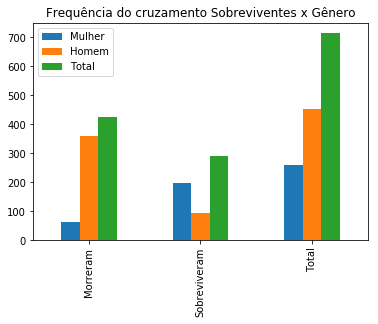

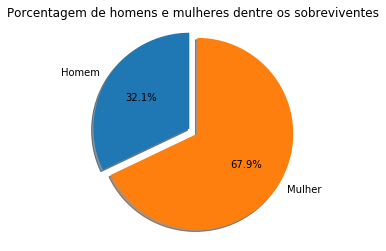

In [441]:
#Frequência
Sobrev_Sex_Freq = pd.crosstab(index=df_titanic_clean["survived"],columns=[df_titanic_clean["sex"]], margins=True)
Sobrev_Sex_Freq.columns = ["Mulher","Homem","Total"]
Sobrev_Sex_Freq.index= ["Morreram","Sobreviveram","Total"]
display(Sobrev_Sex_Freq)

#Porcentagem sobre o total de passageiros
SobrevSex_Perc = (Sobrev_Sex_Freq/Sobrev_Sex_Freq.loc["Total","Total"])*100
display(SobrevSex_Perc)

#Gráfico de Barra para a Frequência
display(Sobrev_Sex_Freq.plot(kind='bar',title="Frequência do cruzamento Sobreviventes x Gênero"))

#Gráfico de Pizza para a Porcentagem
labels = ['Homem', 'Mulher']
H = Sobrev_Sex_Freq["Homem"][1] 
M = Sobrev_Sex_Freq["Mulher"][1] 
sizes = [H, M]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Porcentagem de homens e mulheres dentre os sobreviventes')
plt.show()

#### Informação que pode ser retirada dos gráficos:

Pelo gráfico de barra, conseguimos obter visualmente que o gênero que mais morreu foram os homens e quem mais sobreviveu foram as mulheres (fato também comprovado visualmente e de forma direta pelo gráfico de pizza). Isso se confirma por probabilidade dado que em relação ao total, temos mais homens a bordo do que mulheres, então poderia ser mais provável que mais homens morressem mesmo.


#### 3)  Qual a frequência e proporção da classe dos sobreviventes? Qual classe obteve maior chance de sobrevivência?
Análise das colunas ```df_titanic_clean['pclass']``` e ```df_titanic_clean['survived']```

,Primeira,Segunda,Terceira,Total
Morreram,64,90,270,424
Sobreviveram,122,83,85,290
Total,186,173,355,714


,Primeira,Segunda,Terceira,Total
Morreram,8.963585,12.605042,37.815126,59.383754
Sobreviveram,17.086835,11.624650,11.904762,40.616246
Total,26.050420,24.229692,49.719888,100.000000


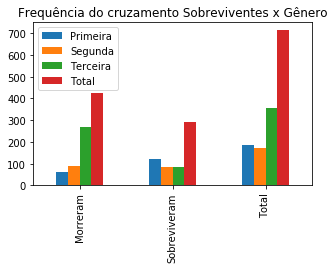

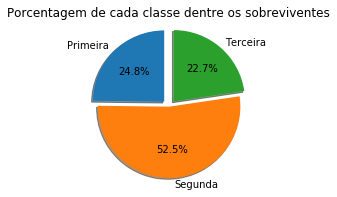

In [696]:
#Frequência
Sobrev_Class_Freq = pd.crosstab(index=df_titanic_clean["survived"],columns=[df_titanic_clean["pclass"]], margins=True)
Sobrev_Class_Freq.columns = ["Primeira","Segunda","Terceira","Total"]
Sobrev_Class_Freq.index= ["Morreram","Sobreviveram","Total"]
display(Sobrev_Class_Freq)
#Porcentagem sobre o total de passageiros
Sobrev_Class_Perc = (Sobrev_Class_Freq/Sobrev_Class_Freq.loc["Total","Total"])*100
display(Sobrev_Class_Perc)

#Gráfico de Barra para a Frequência
Sobrev_Class_Freq.plot(kind='bar',title="Frequência do cruzamento Sobreviventes x Gênero")

#Gráfico de Pizza para a Porcentagem
labels = ['Primeira', 'Segunda', 'Terceira']
P = Sobrev_Class_Freq["Primeira"][1]
S = Sobrev_Class_Freq["Segunda"][1] 
T = Sobrev_Class_Freq["Terceira"][1] 
sizes = [H, M, T]
explode = (0.1, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Porcentagem de cada classe dentre os sobreviventes')
plt.show()

#### Informação que pode ser retirada dos gráficos:

Pelo gráfico de barra, conseguimos obter visualmente que a classe que mais morreu foi a terceira e a que mais sobreviveu foi a primeira (fato também comprovado visualmente e de forma direta pelo gráfico de pizza). Isso se confirma por probabilidade dado que em relação ao total, temos pessoas de terceira classe a bordo do que de primeira, então poderia ser mais provável que mais pessoas da terceira classe morressem mesmo.



#### 4)  Qual a frequência e proporção da gênero+classe dos sobreviventes? Qual combinação obteve maior chance de sobrevivência?
Nessa pergunta, o caminho foi misto, uma combinação das colunas ```df_titanic_clean['sex']``` com a coluna ```df_titanic_clean['pclass']``` interagindo com a coluna ```df_titanic_clean['survived']```

pclass  sex   
1       female    82
        male      40
2       female    68
        male      15
3       female    47
        male      38
Name: survived, dtype: int64

pclass  sex   
1       female    11.484594
        male       5.602241
2       female     9.523810
        male       2.100840
3       female     6.582633
        male       5.322129
Name: survived, dtype: float64

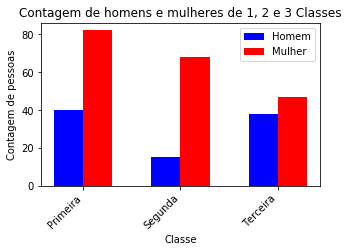

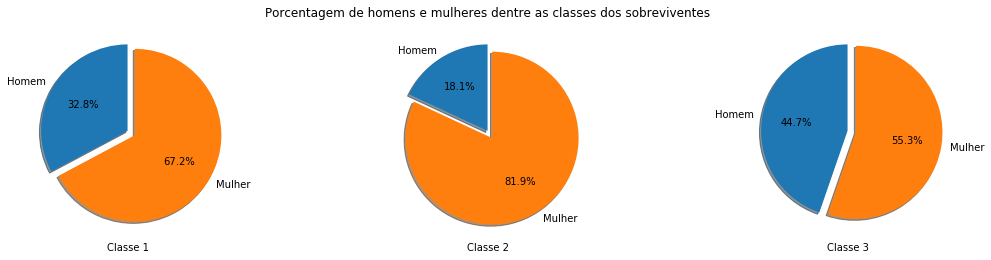

In [653]:
#Frequência da amostra combinada entre gênero e classe dos sobreviventes
display(df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count())
#Proporção da amostra combinada entre gênero e classe dos sobreviventes
display((df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()/df_titanic_clean.shape[0])*100)

#Gráfico de Barra para a Frequência combinada de gênero e classe dos sobreviventes
#Variáveis de count para cada caso
[HC1,HC2,HC3] = [df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()[1]["male"], df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()[2]["male"], df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()[3]["male"]]
[MC1,MC2,MC3] = [df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()[1]["female"],df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()[2]["female"],df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()[3]["female"]]
homem = [HC1,HC2,HC3] # contagem de homens entre (primeira, segunda e terceira classes)
mulher = [MC1,MC2,MC3] # contagem de mulheres entre (primeira, segunda e terceira classes)
categoria = ['Primeira', 'Segunda', 'Terceira']
#Posições e distância das barras
pos = np.arange(3) 
tam = .3 
#Plotagem das barras
fig, ax = plt.subplots()
plt1 = ax.bar(pos-tam/2, homem, tam, color='blue', label='Homem')
plt2 = ax.bar(pos+tam/2, mulher, tam, color='red', label='Mulher')
#Títulos e Rótulos
ax.set_title('Contagem de homens e mulheres de 1, 2 e 3 Classes')
ax.set_xlabel('Classe')
ax.set_ylabel('Contagem de pessoas')
# Define as posições dos ticks
ax.set_xticks(pos) 
ax.set_xticklabels(categoria, rotation=45, ha='right') 
ax.legend();

#Gráfico de Pizza para a Proporção combinada de gênero e classe dos sobreviventes
ProporcaoGC = ((df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()/df_titanic_clean.shape[0])*100)

#Labels e Variáveis de Proporção para cada caso
labels = ['Homem', 'Mulher']
HPC1 = ProporcaoGC[1]["male"]
MPC1 = ProporcaoGC[1]["female"]
HPC2 = ProporcaoGC[2]["male"]
MPC2 = ProporcaoGC[2]["female"]
HPC3 = ProporcaoGC[3]["male"]
MPC3 = ProporcaoGC[3]["female"]
sizes1 = [HPC1, MPC1]
sizes2 = [HPC2, MPC2]
sizes3 = [HPC3, MPC3]
explode = (0, 0.1)
#Figuras para cada classe
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1], aspect=1)
ax1.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.xlabel('Classe 1')
ax2 = fig.add_axes([1, 0,1, 1], aspect=1)
ax2.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.xlabel('Classe 2')
plt.title('Porcentagem de homens e mulheres dentre as classes dos sobreviventes')
ax3 = fig.add_axes([2, 0, 1, 1], aspect=1)
ax3.pie(sizes3, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.xlabel('Classe 3')

plt.show()

#### Informação que pode ser retirada dos gráficos:

Podemos observar de maneira direta pelos gráficos de pizza, a relação de gênero x classe, ou seja, qual gênero mais sobreviveu dentre cada classe. 

Já no caso do gráfico de barra, conseguimos obter visualmente o grupo que obteve maior chance de sobreviver em relação aos outros grupos, e no caso, tivemos que as as mulheres de primeira classe foi a combinação que mais sobreviveu por ter uma quantidade de pessoas maior que as outras combinações.

#### 5)  Qual a idade média dos sobreviventes homens e mulheres da primeira, segunda e terceira classe?

Novamente um caminho combinado das colunas ```df_titanic_clean['sex']``` com a coluna ```df_titanic_clean['pclass']``` visualizando a coluna ```df_titanic_clean['age']``` dado uma seleção de linhas das pessoas que sobreviveram da coluna ```df_titanic_clean['survived']```

In [660]:
display(df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['age'].mean())

pclass  sex   
1       female    34.939024
        male      36.225000
2       female    28.073529
        male      15.866667
3       female    19.297872
        male      22.263158
Name: age, dtype: float64

#### 6)  Qual o preço médio pago no passagem pelos sobreviventes de primeira, segunda e terceira classe? 
Por fim, um caminho combinado das colunas ```df_titanic_clean['sex']``` com a coluna ```df_titanic_clean['pclass']``` visualizando a coluna ```df_titanic_clean['fare']``` dado uma seleção de linhas das pessoas que sobreviveram da coluna ```df_titanic_clean['survived']```

In [661]:
display(df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['fare'].mean())

pclass  sex   
1       female    107.849035
        male       80.160735
2       female     22.277635
        male       22.116947
3       female     12.834043
        male       14.069626
Name: fare, dtype: float64

----

### Etapa 4 e 5: Tirar conclusões e comunicar os resultados

Após a etapa da análise exploratória dos dados, e com o auxílio dos resultados das perguntas propostas, foi possível obter insights sobre os dados para podermos tirar certas conclusões de quem obteve maiores chances de ter sobrevivido ao naufrágio.

Com isso, seguiremos o caminha das respostas das perguntas para conseguirmos objetivamente apresentar as conclusões necessárias para comunicarmos o resultado.

#### 1) Conslusão: No total menos da metade das pessoas sobreviveram ao naufrágio
Com a análise direta da coluna ```df_titanic_clean["survived"]``` foi possível chegar nessa conclusão conclusão.

In [657]:
#Resposta da pergunta 1
print("A frequência de sobreviventes é: {0}\nA porcentagem de sobreviventes é: {1}".format(Freq1,Perc1))            

A frequência de sobreviventes é: 290
A porcentagem de sobreviventes é: 40.61624649859944


#### 2) Conslusão: O gênero com maior probabilidade de sobreviver foram as mulheres
Com a análise multivariada e combinada das colunas ```df_titanic_clean["sex"]``` e ```df_titanic_clean["survived"]``` foi possível chegar nessa conclusão conclusão.

In [665]:
#Resposta da pergunta 2
print("A frequência das mulheres que sobreviveram foi de: {0} representando {1}% dos sobreviventes".format(Sobrev_Sex_Freq["Mulher"][1], SobrevSex_Perc["Mulher"][1]))
print("A frequência dos homens que sobreviveram foi de: {0} representando {1}% dos sobreviventes".format(Sobrev_Sex_Freq["Homem"][1], SobrevSex_Perc["Homem"][1]))

A frequência das mulheres que sobreviveram foi de: 197 representando 27.591036414565828% dos sobreviventes
A frequência dos homens que sobreviveram foi de: 93 representando 13.025210084033615% dos sobreviventes


#### 3) Conslusão: A classe com maior probabilidade de sobreviver foi a primeira classe
Com a análise multivariada e combinada das colunas ```df_titanic_clean["pclass"]``` e ```df_titanic_clean["survived"]``` foi possível chegar nessa conclusão conclusão.

In [667]:
#Resposta da pergunta 3
print("A frequência da primeira classe que sobreviveram foi de: {0} representando {1}% dos sobreviventes".format(Sobrev_Class_Freq["Primeira"][1], Sobrev_Class_Perc["Primeira"][1]))
print("A frequência da segunda classe que sobreviveram foi de: {0} representando {1}% dos sobreviventes".format(Sobrev_Class_Freq["Segunda"][1], Sobrev_Class_Perc["Segunda"][1]))
print("A frequência da terceira classe que sobreviveram foi de: {0} representando {1}% dos sobreviventes".format(Sobrev_Class_Freq["Terceira"][1], Sobrev_Class_Perc["Terceira"][1]))

A frequência da primeira classe que sobreviveram foi de: 122 representando 17.086834733893557% dos sobreviventes
A frequência da segunda classe que sobreviveram foi de: 83 representando 11.624649859943977% dos sobreviventes
A frequência da terceira classe que sobreviveram foi de: 85 representando 11.904761904761903% dos sobreviventes


#### 4) Conslusão: A combinação que obteve a maior chance de sobrevivência foram as mulheres da primeira classe com 11.4%
Com a análise multivariada e combinada das colunas ```df_titanic_clean["sex"]```,```df_titanic_clean["pclass"]``` e ```df_titanic_clean["survived"]``` foi possível chegar nessa conclusão conclusão.

In [681]:
#Resposta da pergunta 4
Freq4 = df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()
Perc4 = (df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['survived'].count()/df_titanic_clean.shape[0])*100

print("A frequência das mulheres sobreviventes de primeira classe foi de {0} representando {1} do total".format(Freq4[1]["female"], Perc4[1]["female"]))
print("A frequência dos homens sobreviventes de primeira classe foi de {0} representando {1} do total".format(Freq4[1]["male"], Perc4[1]["male"]))
print("A frequência das mulheres sobreviventes de segunda classe foi de {0} representando {1} do total".format(Freq4[2]["female"], Perc4[2]["female"]))
print("A frequência dos homens sobreviventes de segunda classe foi de {0} representando {1} do total".format(Freq4[2]["male"], Perc4[2]["male"]))
print("A frequência das mulheres sobreviventes de terceira classe foi de {0} representando {1} do total".format(Freq4[3]["female"], Perc4[3]["female"]))
print("A frequência dos homens sobreviventes de terceira classe foi de {0} representando {1} do total".format(Freq4[3]["male"], Perc4[3]["male"]))

A frequência das mulheres sobreviventes de primeira classe foi de 82 representando 11.484593837535014 do total
A frequência dos homens sobreviventes de primeira classe foi de 40 representando 5.602240896358544 do total
A frequência das mulheres sobreviventes de segunda classe foi de 68 representando 9.523809523809524 do total
A frequência dos homens sobreviventes de segunda classe foi de 15 representando 2.100840336134454 do total
A frequência das mulheres sobreviventes de terceira classe foi de 47 representando 6.582633053221289 do total
A frequência dos homens sobreviventes de terceira classe foi de 38 representando 5.322128851540616 do total


#### 5) Conslusão: A idade média do grupo com maior probabilidade de sobrevivência foi de 34.9 anos
#### Insight: A média de idade do grupo que mais morreu foram de homens de 15.8 anos representando um público bem jovem e a mais baixa de todas
Com a combinação das colunas ```df_titanic_clean['sex']```, ```df_titanic_clean['pclass']``` visualizando a coluna ```df_titanic_clean['age']``` conseguimos obter a informação dada prévia seleção dos sobreviventes.

In [692]:
#Resposta da pergunta 5
id_med = df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['age'].mean()

print("A idade média das mulheres sobreviventes de primeira classe foi de {0}".format(id_med[1]["female"]))
print("A idade média dos homens sobreviventes de primeira classe foi de {0}".format(id_med[1]["male"]))
print("A idade média das mulheres sobreviventes de segunda classe foi de {0}".format(id_med[2]["female"]))
print("A idade média dos homens sobreviventes de segunda classe foi de {0}".format(id_med[2]["male"]))
print("A idade média das mulheres sobreviventes de terceira classe foi de {0}".format(id_med[3]["female"]))
print("A idade média dos homens sobreviventes de terceira classe foi de {0}".format(id_med[3]["male"]))

A idade média das mulheres sobreviventes de primeira classe foi de 34.9390243902439
A idade média dos homens sobreviventes de primeira classe foi de 36.225
A idade média das mulheres sobreviventes de segunda classe foi de 28.073529411764707
A idade média dos homens sobreviventes de segunda classe foi de 15.866666666666667
A idade média das mulheres sobreviventes de terceira classe foi de 19.29787234042553
A idade média dos homens sobreviventes de terceira classe foi de 22.263157894736842


#### 6) Conslusão: O preço médio do ticket do grupo com maior probabilidade de sobrevivência foi de 107.84 dólares
#### Insight: Justamente o público que mais sobreviveu (mulheres de primeira classe) foram as pessoas que mais pagaram pela passagem.

Com a combinação das colunas ```df_titanic_clean['sex']```, ```df_titanic_clean['pclass']``` visualizando a coluna ```df_titanic_clean['fare']``` conseguimos obter a informação dada prévia seleção dos sobreviventes.

In [695]:
#Resposta da pergunta 6
preco_med = df_titanic_clean.query('survived == 1').groupby(['pclass','sex'])['fare'].mean()

print("O preço médio das mulheres sobreviventes de primeira classe foi de {0}".format(preco_med[1]["female"]))
print("O preço médio dos homens sobreviventes de primeira classe foi de {0}".format(preco_med[1]["male"]))
print("O preço médio das mulheres sobreviventes de segunda classe foi de {0}".format(preco_med[2]["female"]))
print("O preço médio dos homens sobreviventes de segunda classe foi de {0}".format(preco_med[2]["male"]))
print("O preço médio das mulheres sobreviventes de terceira classe foi de {0}".format(preco_med[3]["female"]))
print("O preço médio dos homens sobreviventes de terceira classe foi de {0}".format(preco_med[3]["male"]))

O preço médio das mulheres sobreviventes de primeira classe foi de 107.84903536585364
O preço médio dos homens sobreviventes de primeira classe foi de 80.16073500000002
O preço médio das mulheres sobreviventes de segunda classe foi de 22.277635294117648
O preço médio dos homens sobreviventes de segunda classe foi de 22.116946666666664
O preço médio das mulheres sobreviventes de terceira classe foi de 12.834042553191491
O preço médio dos homens sobreviventes de terceira classe foi de 14.069626315789478


### Problemas encontrados

Um dos problemas encontrados foi na coluna da cabine a ```df_titanic["Cabin"]``` onde devido uma falta substancial de informações com várias linhas nulas, ela teve de ser infelizmente removida, pois talvez seria possível realizar a identificação da zona onde a pessoa estava inserida no navio e mapear os locais mais seguros do Titanic dado ao acidente de naufrágio, porém, sua análise foi impossibilitada.

Outro problema, que gerou certa dor de cabeça foi a coluna ```df_titanic["Age"]``` que possuia alguns elementos faltantes do tipo NaN, e alguns números fora do padrão int, mas nada que não podesse ser limpo e posteriormente analisado.



## Bibliografia

Escreva os links que vocês usaram para escrever esse projeto.

[1. https://pt.wikipedia.org/wiki/RMS_Titanic](https://pt.wikipedia.org/wiki/RMS_Titanic)

[2. https://guides.github.com/features/mastering-markdown](https://guides.github.com/features/mastering-markdown/)

[3. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html)

[4. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html)

[5. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)